# Questions

- How to do Gropuing? Tactic wise, (X) wise
- Many tactics have less than 500 groupings
- 500 samples per tactic or 500 times sampling (if yes, how many samples per sampling)?
- How to handle null dates
- How to Analyze:
 - days - upper and lower limit
 - money - upper and lower limit
- What are alpha and beta


In [33]:
import pandas as pd

In [34]:
path = 'H:\marketing_task1_FILTERED.xlsx'

In [35]:
df = pd.read_excel(path)

In [4]:
df.head()

,program_id,opportunity_id,created_key,money_collected,created_date,tactic_type,program_date,Days after lead genrated
0,14101,0065000000hOzwxAAC,20171009,0.0,2017-10-09,Seminar (S),2018-09-20,-346
1,14101,0065000000hOzyUAAS,20171009,0.0,2017-10-09,Seminar (S),2018-09-20,-346
2,14101,0065000000hP00kAAC,20171009,0.0,2017-10-09,Seminar (S),2018-09-20,-346
3,14101,0065000000hOzzNAAS,20171009,0.0,2017-10-09,Seminar (S),2018-09-20,-346
4,14101,0065000000hP001AAC,20171009,0.0,2017-10-09,Seminar (S),2018-09-20,-346


In [5]:
df.describe()

,program_id,created_key,money_collected,Days after lead genrated
count,73638.000000,7.363800e+04,7.363800e+04,73638.000000
mean,8758.646337,2.017288e+07,1.665692e+04,826.591203
std,3518.940522,6.165630e+03,7.616299e+04,621.579216
min,1011.000000,2.016100e+07,-8.752800e+04,-346.000000
25%,6139.000000,2.017033e+07,0.000000e+00,304.000000
50%,9115.000000,2.017092e+07,1.487500e+02,695.000000
75%,11238.000000,2.018022e+07,9.842340e+03,1255.000000
max,16812.000000,2.018073e+07,4.791700e+06,2494.000000


In [6]:
df.columns

Index(['program_id', 'opportunity_id', 'created_key', 'money_collected',
       'created_date', 'tactic_type', 'program_date',
       'Days after lead genrated'],
      dtype='object')

In [36]:
df = df[df['Days after lead genrated']>=0]
df = df[df['Days after lead genrated']<=730]
df = df[df['money_collected']>0]
df.head()

,program_id,opportunity_id,created_key,money_collected,created_date,tactic_type,program_date,Days after lead genrated
362,13288,0065000000hNQbEAAW,20170914,9000.00,2017-09-14,F5 User Group (U),2017-09-14,0
364,13380,0065000000gpdBNAAY,20170801,1009.44,2017-08-01,Email Offer (E),2017-08-01,0
369,11531,0065000000dihqNAAQ,20161103,35618.86,2016-11-03,Tradeshow (T),2016-11-03,0
370,15079,0065000000jKOyuAAG,20180131,7297.31,2018-01-31,Hosted Events - TechXchange (S),2018-01-31,0
371,11531,0065000000dihoCAAQ,20161103,11209.38,2016-11-03,Tradeshow (T),2016-11-03,0


In [8]:
sum(df.groupby('program_id')['opportunity_id'].nunique()>1)
df['number_opps_in_program']=df.groupby('program_id')['opportunity_id'].transform(lambda x : x.nunique())
(df['number_opps_in_program'] > 1).sum()

20629

In [37]:
df=df.sort_values(by=['program_id', 'Days after lead genrated'], ascending=True)


In [38]:
df['money_csum'] = df.groupby(['program_id'])['money_collected'].cumsum()
#df['money_csum_cent'] = 100*df.money_csum/df.groupby(['program_id'])['money_collected'].sum()
df['cum_pct'] = df.groupby('program_id')['money_csum'].transform(lambda x: x * 100/ x.iloc[-1])

df

,program_id,opportunity_id,created_key,money_collected,created_date,tactic_type,program_date,Days after lead genrated,money_csum,cum_pct
37203,6703,0065000000dU0YGAA0,20161005,7162.28,2016-10-05,Email Offer (E),2014-10-30,706,7162.28,6.505488
37377,6703,0065000000dgsyYAAQ,20161011,44579.27,2016-10-11,Email Offer (E),2014-10-30,712,51741.55,46.996774
37654,6703,0065000000dhKgjAAE,20161018,40620.84,2016-10-18,Email Offer (E),2014-10-30,719,92362.39,83.892624
37850,6703,0065000000dhommAAA,20161024,16163.38,2016-10-24,Email Offer (E),2014-10-30,725,108525.77,98.573799
37881,6703,0065000000dhsp0AAA,20161025,1570.19,2016-10-25,Email Offer (E),2014-10-30,726,110095.96,100.000000
37631,6728,0065000000dgrmlAAA,20161010,240.42,2016-10-10,F5 User Group (U),2014-10-23,718,240.42,100.000000
37608,6772,0065000000dU0YGAA0,20161005,7162.28,2016-10-05,F5 User Group (U),2014-10-19,717,7162.28,100.000000
37833,6775,0065000000dgtCdAAI,20161011,406.14,2016-10-11,Online Media (O),2014-10-18,724,406.14,100.000000
38007,6839,0065000000dhCPXAA2,20161016,1576.77,2016-10-16,Webinar (W),2014-10-19,728,1576.77,100.000000
38069,6847,0065000000dhFr5AAE,20161017,240732.69,2016-10-17,Online Media (O),2014-10-18,730,240732.69,100.000000


In [39]:
# df2=df1
# df2['tactic_name'] = df2.tactic_type.str[:-4].str.strip()
# df2['tactic_letter'] = df2.tactic_type.str[-2].str.strip()
tactic_name = []
tactic_letter = []
for tactics in df['tactic_type']:
    tactic_name.append(tactics[:-4].strip())
    tactic_letter.append(tactics[-2].strip())
    
df['tactic_name']=tactic_name
df['tactic_letter']=tactic_letter
df.head()

,program_id,opportunity_id,created_key,money_collected,created_date,tactic_type,program_date,Days after lead genrated,money_csum,cum_pct,tactic_name,tactic_letter
37203,6703,0065000000dU0YGAA0,20161005,7162.28,2016-10-05,Email Offer (E),2014-10-30,706,7162.28,6.505488,Email Offer,E
37377,6703,0065000000dgsyYAAQ,20161011,44579.27,2016-10-11,Email Offer (E),2014-10-30,712,51741.55,46.996774,Email Offer,E
37654,6703,0065000000dhKgjAAE,20161018,40620.84,2016-10-18,Email Offer (E),2014-10-30,719,92362.39,83.892624,Email Offer,E
37850,6703,0065000000dhommAAA,20161024,16163.38,2016-10-24,Email Offer (E),2014-10-30,725,108525.77,98.573799,Email Offer,E
37881,6703,0065000000dhsp0AAA,20161025,1570.19,2016-10-25,Email Offer (E),2014-10-30,726,110095.96,100.000000,Email Offer,E


In [40]:
df1 = df[['program_id','Days after lead genrated','money_collected','cum_pct','tactic_letter']]

In [13]:
df1.count()
df1.columns
df1.head()

,program_id,Days after lead genrated,money_collected,cum_pct,tactic_letter
37203,6703,706,7162.28,6.505488,E
37377,6703,712,44579.27,46.996774,E
37654,6703,719,40620.84,83.892624,E
37850,6703,725,16163.38,98.573799,E
37881,6703,726,1570.19,100.000000,E


In [41]:
df_with_single_Id = df1['program_id'].drop_duplicates()
df_with_single_Id.count()

2960

In [42]:
grouped_by_letter = df1.groupby(['tactic_letter'])
list_of_letter = df1['tactic_letter'].unique()
# grouped_by_letter.get_group("O")

In [43]:
group = {}
for letters in list_of_letter:
    group[letters] = grouped_by_letter.get_group(letters)

#group["C"]
# group['C'].shape
# group.keys()

In [44]:
groups_greater_than_100 = {}
groups_less_than_100 = {}
for key in group.keys():
    if(group[key].shape[0] >=100):
        groups_greater_than_100[key] = group[key]
    else:
        groups_less_than_100[key] = group[key]

In [45]:
groups_greater_than_100.keys()

dict_keys(['E', 'U', 'O', 'W', 'T', 'F', 'S', 'N', 'L', 'C'])

In [19]:
groups_less_than_100.keys()

dict_keys(['P', 'B'])

In [46]:
for key in groups_greater_than_100.keys():
    print(key, groups_greater_than_100[key].shape[0])

E 3494
U 1726
O 1260
W 2944
T 4613
F 2277
S 3456
N 1052
L 219
C 428


In [21]:
# list_unique_prog_id = []
# list_unique_prog_id = groups_greater_than_100[key]['program_id'].drop_duplicates()
# sample = list_unique_prog_id.sample(frac=0.2).reset_index()
# program_id_list = sample['program_id'].tolist()

# df_sample = groups_greater_than_100[key][groups_greater_than_100[key]['program_id'].isin(program_id_list)]
# df_sample

In [47]:
samples_by_group = {}
samples_by_group_pid = {}
#list_unique_prog_id = []
for key in groups_greater_than_100.keys():
    list_of_samples = []
    list_unique_prog_id = groups_greater_than_100[key]['program_id'].drop_duplicates()
    for i in range(1000):
        sample = list_unique_prog_id.sample(frac=0.5).reset_index()
        sample_list = sample['program_id'].tolist()
        local_df = groups_greater_than_100[key]
        df_sample = local_df[local_df['program_id'].isin(sample_list)]
        list_of_samples.append(df_sample)
    samples_by_group[key] = list_of_samples
   # samples_by_group_pid[key] = list_unique_prog_id
    
#print(samples_by_group_pid)

In [23]:
# samples_by_group = {}

# for key in groups_greater_than_100.keys():
#     list_of_samples = []
#     for i in range(500):
#         sample = groups_greater_than_100[key].sample(frac=0.2).reset_index()
#         list_of_samples.append(sample)
#     samples_by_group[key] = list_of_samples

In [24]:
## ith sample of group 'key'
#samples_by_group[key][i]
#Eg:
samples_by_group['S'][0]

,program_id,Days after lead genrated,money_collected,cum_pct,tactic_letter
35672,7104,663,274.88,13.092516,S
36178,7104,676,1382.61,78.946140,S
37024,7104,701,442.03,100.000000,S
37762,7143,722,5602.23,100.000000,S
36823,7194,695,20619.79,100.000000,S
37863,7309,725,27847.10,100.000000,S
36711,7310,692,2749.63,100.000000,S
31904,7385,580,8371.39,8.754244,S
31949,7385,581,1435.99,10.255907,S
33962,7385,625,16042.50,27.032088,S


In [48]:
### loop for all the samples in all the letters

import numpy as np
from scipy.optimize import curve_fit


#def func(x,a,b,c):
#    return a*np.exp(-b*x)+c
def func(x,a,b,c,d):
    return a + b*x + c*(x**2) + d*(x**3)

results_by_group = {}
for key in groups_greater_than_100.keys():
    list_of_samples = samples_by_group[key]
    list_of_results = []
    for sample in list_of_samples:
        y = sample['cum_pct'].values
        x = sample['Days after lead genrated'].values
        popt, _ = curve_fit(f=func, xdata=x, ydata = y)
        list_of_results.append(popt)
    results_by_group[key] = list_of_results         

        

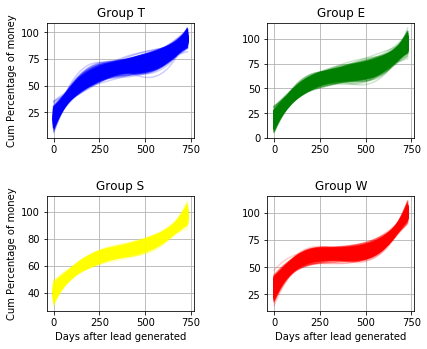

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,730, 1000)

plt.figure(1)


p1=plt.subplot(221)
for i in results_by_group['T']:
    y = func(x, i[0], i[1], i[2], i[3])
    plt.plot(x, y, alpha = 0.2, color = 'blue')
# plt.yscale('linear')
plt.title('Group T')
plt.ylabel("Cum Percentage of money")
plt.grid(True)


plt.subplot(222, sharex=p1)
for i in results_by_group['E']:
    y = func(x, i[0], i[1], i[2], i[3])
    plt.plot(x, y, alpha = 0.2, color = 'green')
# plt.yscale('linear')
plt.title('Group E')

plt.grid(True)


p3=plt.subplot(223)
for i in results_by_group['S']:
    y = func(x, i[0], i[1], i[2], i[3])
    plt.plot(x, y, alpha = 0.2, color = 'yellow')
# plt.yscale('linear')
plt.title('Group S')
plt.ylabel("Cum Percentage of money")
plt.xlabel("Days after lead generated")
plt.grid(True)


plt.subplot(224, sharex=p3)
for i in results_by_group['W']:
    y = func(x, i[0], i[1], i[2], i[3])
    plt.plot(x, y, alpha = 0.2, color = 'red')
# plt.yscale('linear')
plt.title('Group W')
plt.xlabel("Days after lead generated")
plt.grid(True)

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=1, bottom=0, left=0.10, right=0.95, hspace=.50,
                     wspace=.50)
# plt.tight_layout()

Text(0.5,1,'Group W')

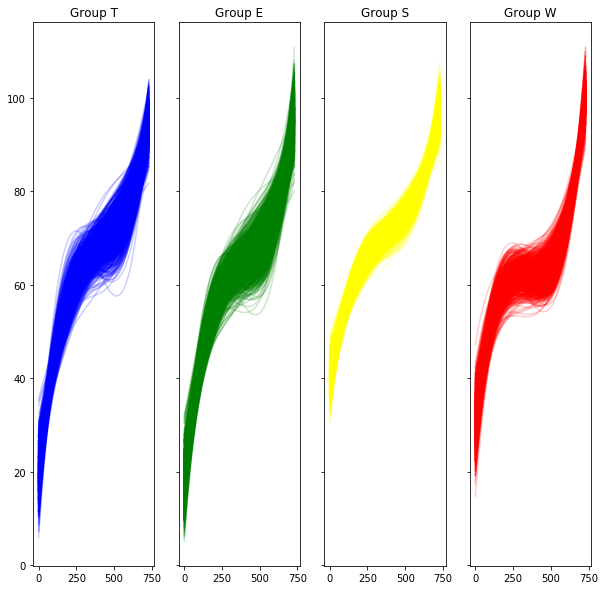

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,730, 1000)

fig, ax1 = plt.subplots(1,4, sharex=True, sharey=True,figsize=(10,10))


for i in results_by_group['T']:
    y = func(x, i[0], i[1], i[2], i[3])
    ax1[0].plot(x, y, alpha = 0.2, color = 'blue')
# plt.yscale('linear')
ax1[0].set_title('Group T')
#ax1[0].ylabel("Cum Percentage of money")
#ax1[1].grid(True)


for i in results_by_group['E']:
    y = func(x, i[0], i[1], i[2], i[3])
    ax1[1].plot(x, y, alpha = 0.2, color = 'green')
# plt.yscale('linear')
ax1[1].set_title('Group E')

#plt.grid(True)


for i in results_by_group['S']:
    y = func(x, i[0], i[1], i[2], i[3])
    ax1[2].plot(x, y, alpha = 0.2, color = 'yellow')
# plt.yscale('linear')
ax1[2].set_title('Group S')
#plt.ylabel("Cum Percentage of money")
#plt.xlabel("Days after lead generated")
#plt.grid(True)


for i in results_by_group['W']:
    y = func(x, i[0], i[1], i[2], i[3])
    ax1[3].plot(x, y, alpha = 0.2, color = 'red')
ax1[3].set_title('Group W')
# plt.yscale('linear')
#plt.title('Group W')
#plt.xlabel("Days after lead generated")
#plt.grid(True)

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
#plt.subplots_adjust(top=1, bottom=0, left=0.10, right=0.95, hspace=.50,
#                     wspace=.50)
# plt.tight_layout()

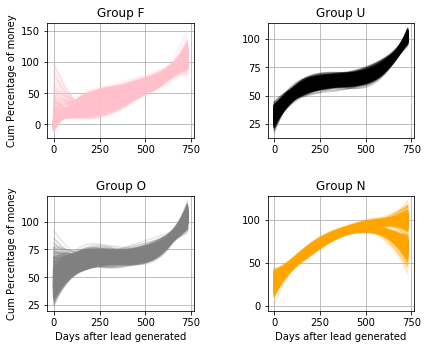

In [32]:
plt.figure(2)

p4 = plt.subplot(221)
for i in results_by_group['F']:
    y = func(x, i[0], i[1], i[2], i[3])
    plt.plot(x, y, alpha = 0.2, color = 'pink')
# plt.yscale('linear')
plt.title('Group F')
plt.ylabel("Cum Percentage of money")
plt.grid(True)


plt.subplot(222, sharex=p4)
for i in results_by_group['U']:
    y = func(x, i[0], i[1], i[2], i[3])
    plt.plot(x, y, alpha = 0.2, color = 'black')
# plt.yscale('linear')
plt.title('Group U')
plt.grid(True)

p5 = plt.subplot(223)
for i in results_by_group['O']:
    y = func(x, i[0], i[1], i[2], i[3])
    plt.plot(x, y, alpha = 0.2, color = 'grey')
# plt.yscale('linear')
plt.title('Group O')
plt.ylabel("Cum Percentage of money")
plt.xlabel("Days after lead generated")
plt.grid(True)

plt.subplot(224, sharex = p5)
for i in results_by_group['N']:
    y = func(x, i[0], i[1], i[2], i[3])
    plt.plot(x, y, alpha = 0.2, color = 'orange')
# plt.yscale('linear')
plt.title('Group N')
plt.xlabel("Days after lead generated")
plt.grid(True)

plt.subplots_adjust(top=1, bottom=0, left=0.10, right=0.95, hspace=.50,
                     wspace=.50)

plt.show()

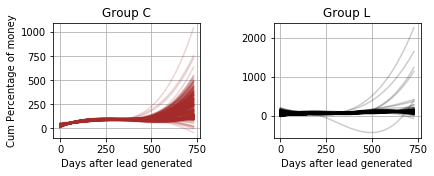

In [28]:
plt.figure(1)
plt.subplot(221)
for i in results_by_group['C']:
    y = func(x, i[0], i[1], i[2], i[3])
    plt.plot(x, y, alpha = 0.2, color = 'brown')
# plt.yscale('linear')
plt.title('Group C')
plt.ylabel("Cum Percentage of money")
plt.xlabel("Days after lead generated")
plt.grid(True)


plt.subplot(222)
for i in results_by_group['L']:
    y = func(x, i[0], i[1], i[2], i[3])
    plt.plot(x, y, alpha = 0.2, color = 'black')
# plt.yscale('linear')
plt.title('Group L')
plt.xlabel("Days after lead generated")
plt.grid(True)

plt.subplots_adjust(top=1, bottom=0, left=0.10, right=0.95, hspace=.50,
                     wspace=.50)

plt.show()

In [29]:
# web_df = samples_by_group['T'][2]
# web_df.plot.scatter(x='Days after lead genrated', y='cum_pct')